## 第8章: ニューラルネット
第6章で取り組んだニュース記事のカテゴリ分類を題材として，ニューラルネットワークでカテゴリ分類モデルを実装する．なお，この章ではPyTorch, TensorFlow, Chainerなどの機械学習プラットフォームを活用せよ．

#### 70. 単語ベクトルの和による特徴量

問題50で構築した学習データ，検証データ，評価データを行列・ベクトルに変換したい．例えば，学習データについて，すべての事例$x_i$の特徴ベクトル$\boldsymbol{x}_i$を並べた行列$X$と正解ラベルを並べた行列（ベクトル）$Y$を作成したい．

$$X = \begin{pmatrix} 
  \boldsymbol{x}_1 \\ 
  \boldsymbol{x}_2 \\ 
  \dots \\ 
  \boldsymbol{x}_n \\ 
\end{pmatrix} \in \mathbb{R}^{n \times d},
Y = \begin{pmatrix} 
  y_1 \\ 
  y_2 \\ 
  \dots \\ 
  y_n \\ 
\end{pmatrix} \in \mathbb{N}^{n}$$


ここで，$n$は学習データの事例数であり，$\boldsymbol x_i \in \mathbb{R}^d$と$y_i \in \mathbb N$はそれぞれ，$i \in \{1, \dots, n\}$番目の事例の特徴量ベクトルと正解ラベルを表す．
なお，今回は「ビジネス」「科学技術」「エンターテイメント」「健康」の4カテゴリ分類である．$\mathbb N_{<4}$で$4$未満の自然数（$0$を含む）を表すことにすれば，任意の事例の正解ラベル$y_i$は$y_i \in \mathbb N_{<4}$で表現できる．
以降では，ラベルの種類数を$L$で表す（今回の分類タスクでは$L=4$である）．

$i$番目の事例の特徴ベクトル$\boldsymbol x_i$は，次式で求める．

$$\boldsymbol x_i = \frac{1}{T_i} \sum_{t=1}^{T_i} \mathrm{emb}(w_{i,t})$$

ここで，$i$番目の事例は$T_i$個の（記事見出しの）単語列$(w_{i,1}, w_{i,2}, \dots, w_{i,T_i})$から構成され，$\mathrm{emb}(w) \in \mathbb{R}^d$は単語$w$に対応する単語ベクトル（次元数は$d$）である．すなわち，$i$番目の事例の記事見出しを，その見出しに含まれる単語のベクトルの平均で表現したものが$\boldsymbol x_i$である．今回は単語ベクトルとして，問題60でダウンロードしたものを用いればよい．$300$次元の単語ベクトルを用いたので，$d=300$である．
$i$番目の事例のラベル$y_i$は，次のように定義する．


$$y_i = \begin{cases}
0 & (\mbox{記事}\boldsymbol x_i\mbox{が「ビジネス」カテゴリの場合}) \\
1 & (\mbox{記事}\boldsymbol x_i\mbox{が「科学技術」カテゴリの場合}) \\
2 & (\mbox{記事}\boldsymbol x_i\mbox{が「エンターテイメント」カテゴリの場合}) \\
3 & (\mbox{記事}\boldsymbol x_i\mbox{が「健康」カテゴリの場合}) \\
\end{cases}$$

なお，カテゴリ名とラベルの番号が一対一で対応付いていれば，上式の通りの対応付けでなくてもよい．

以上の仕様に基づき，以下の行列・ベクトルを作成し，ファイルに保存せよ．

+ 学習データの特徴量行列: $X_{\rm train} \in \mathbb{R}^{N_t \times d}$
+ 学習データのラベルベクトル: $Y_{\rm train} \in \mathbb{N}^{N_t}$
+ 検証データの特徴量行列: $X_{\rm valid} \in \mathbb{R}^{N_v \times d}$
+ 検証データのラベルベクトル: $Y_{\rm valid} \in \mathbb{N}^{N_v}$
+ 評価データの特徴量行列: $X_{\rm test} \in \mathbb{R}^{N_e \times d}$
+ 評価データのラベルベクトル: $Y_{\rm test} \in \mathbb{N}^{N_e}$

なお，$N_t, N_v, N_e$はそれぞれ，学習データの事例数，検証データの事例数，評価データの事例数である．

まずは、指定のデータをダウンロード後、データフレームとして読込みます。そして、学習データ、検証データ、評価データに分割し、保存します。
ここまでは、第6章の問題50とまったく同じ処理のため、そちらで作成したデータを読み込んでも問題ありません。

In [1]:
%load_ext lab_black

In [2]:
# データのダウンロード
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00359/NewsAggregatorDataset.zip
!unzip NewsAggregatorDataset.zip

--2021-12-12 05:59:57--  https://archive.ics.uci.edu/ml/machine-learning-databases/00359/NewsAggregatorDataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29224203 (28M) [application/x-httpd-php]
Saving to: ‘NewsAggregatorDataset.zip’

NewsAggregatorDatas 100%[===================>]  27.87M  1.52MB/s    in 20s     

2021-12-12 06:00:19 (1.37 MB/s) - ‘NewsAggregatorDataset.zip’ saved [29224203/29224203]

Archive:  NewsAggregatorDataset.zip
  inflating: 2pageSessions.csv       
   creating: __MACOSX/
  inflating: __MACOSX/._2pageSessions.csv  
  inflating: newsCorpora.csv         
  inflating: __MACOSX/._newsCorpora.csv  
  inflating: readme.txt              
  inflating: __MACOSX/._readme.txt   


In [3]:
# 読込時のエラー回避のためダブルクォーテーションをシングルクォーテーションに置換
!sed -e 's/"/'\''/g' ./newsCorpora.csv > ./newsCorpora_re.csv

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split

# データの読込
df = pd.read_csv(
    "./newsCorpora_re.csv",
    header=None,
    sep="\t",
    names=[
        "ID",
        "TITLE",
        "URL",
        "PUBLISHER",
        "CATEGORY",
        "STORY",
        "HOSTNAME",
        "TIMESTAMP",
    ],
)

# データの抽出
df = df.loc[
    df["PUBLISHER"].isin(
        ["Reuters", "Huffington Post", "Businessweek", "Contactmusic.com", "Daily Mail"]
    ),
    ["TITLE", "CATEGORY"],
]

# データの分割
train, valid_test = train_test_split(
    df, test_size=0.2, shuffle=True, random_state=123, stratify=df["CATEGORY"]
)
valid, test = train_test_split(
    valid_test,
    test_size=0.5,
    shuffle=True,
    random_state=123,
    stratify=valid_test["CATEGORY"],
)

# 事例数の確認
print("【学習データ】")
print(train["CATEGORY"].value_counts())
print("【検証データ】")
print(valid["CATEGORY"].value_counts())
print("【評価データ】")
print(test["CATEGORY"].value_counts())

【学習データ】
b    4501
e    4235
t    1220
m     728
Name: CATEGORY, dtype: int64
【検証データ】
b    563
e    529
t    153
m     91
Name: CATEGORY, dtype: int64
【評価データ】
b    563
e    530
t    152
m     91
Name: CATEGORY, dtype: int64


In [5]:
# FILE_ID = "0B7XkCwpI5KDYNlNUTTlSS21pQmM"
# FILE_NAME = "GoogleNews-vectors-negative300.bin.gz"
# !wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=$FILE_ID' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=$FILE_ID" -O $FILE_NAME && rm -rf /tmp/cookies.txt

# 下記からダウンロードできます。
# https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz

In [6]:
from gensim.models import KeyedVectors

model = KeyedVectors.load_word2vec_format(
    "./GoogleNews-vectors-negative300.bin.gz", binary=True
)

In [7]:
import string

import torch


def transform_w2v(text):
    table = str.maketrans(string.punctuation, " " * len(string.punctuation))
    words = text.translate(table).split()  # 記号をスペースに置換後、スペースで分割してリスト化
    vec = [model[word] for word in words if word in model]  # 1語ずつベクトル化

    return torch.tensor(sum(vec) / len(vec))  # 平均ベクトルをTensor型に変換して出力

In [8]:
# 特徴ベクトルの作成
X_train = torch.stack([transform_w2v(text) for text in train["TITLE"]])
X_valid = torch.stack([transform_w2v(text) for text in valid["TITLE"]])
X_test = torch.stack([transform_w2v(text) for text in test["TITLE"]])

print(X_train.size())
print(X_train)

torch.Size([10684, 300])
tensor([[ 0.0837,  0.0056,  0.0068,  ...,  0.0751,  0.0433, -0.0868],
        [ 0.0272,  0.0266, -0.0947,  ..., -0.1046, -0.0489, -0.0092],
        [ 0.0577, -0.0159, -0.0780,  ..., -0.0421,  0.1229,  0.0876],
        ...,
        [ 0.0392, -0.0052,  0.0686,  ..., -0.0175,  0.0061, -0.0224],
        [ 0.0798,  0.1017,  0.1066,  ..., -0.0752,  0.0623,  0.1138],
        [ 0.1664,  0.0451,  0.0508,  ..., -0.0531, -0.0183, -0.0039]])


In [9]:
# ラベルベクトルの作成
category_dict = {"b": 0, "t": 1, "e": 2, "m": 3}
y_train = torch.tensor(train["CATEGORY"].map(lambda x: category_dict[x]).values)
y_valid = torch.tensor(valid["CATEGORY"].map(lambda x: category_dict[x]).values)
y_test = torch.tensor(test["CATEGORY"].map(lambda x: category_dict[x]).values)

print(y_train.size())
print(y_train)

torch.Size([10684])
tensor([0, 1, 3,  ..., 0, 3, 2])


In [10]:
torch.save(X_train, "X_train.pt")
torch.save(X_valid, "X_valid.pt")
torch.save(X_test, "X_test.pt")
torch.save(y_train, "y_train.pt")
torch.save(y_valid, "y_valid.pt")
torch.save(y_test, "y_test.pt")

#### 71. 単層ニューラルネットワークによる予測
問題70で保存した行列を読み込み，学習データについて以下の計算を実行せよ．

$$\hat{y}_1=softmax(x_1W),\\\hat{Y}=softmax(X_{[1:4]}W)$$

ただし，$softmax$はソフトマックス関数，$X_{[1:4]}∈\mathbb{R}^{4×d}$は特徴ベクトル$x_1$,$x_2$,$x_3$,$x_4$を縦に並べた行列である．

$$X_{[1:4]}=\begin{pmatrix}x_1\\x_2\\x_3\\x_4\end{pmatrix}$$

行列$W \in \mathbb{R}^{d \times L}$は単層ニューラルネットワークの重み行列で，ここではランダムな値で初期化すればよい（問題73以降で学習して求める）．なお，$\hat{\boldsymbol y_1} \in \mathbb{R}^L$は未学習の行列$W$で事例$x_1$を分類したときに，各カテゴリに属する確率を表すベクトルである．
同様に，$\hat{Y} \in \mathbb{R}^{n \times L}$は，学習データの事例$x_1, x_2, x_3, x_4$について，各カテゴリに属する確率を行列として表現している．

はじめに、```SLPNet```という単層ニューラルネットワークを定義します。```__init__```でネットワークを構成するレイヤーを定義し、```forward```メソッドでインプットデータが順伝播時に通るレイヤーを順に配置していきます。

In [11]:
from torch import nn


class SLPNet(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.fc = nn.Linear(input_size, output_size, bias=False)
        nn.init.normal_(self.fc.weight, 0.0, 1.0)  # 正規乱数で重みを初期化

    def forward(self, x):
        x = self.fc(x)
        return x

続いて、定義したモデルを初期化し、指示された計算を実行します。

In [12]:
model = SLPNet(300, 4)  # 単層ニューラルネットワークの初期化
y_hat_1 = torch.softmax(model(X_train[:1]), dim=-1)
print(y_hat_1)

tensor([[0.0320, 0.2090, 0.2531, 0.5059]], grad_fn=<SoftmaxBackward0>)


In [13]:
Y_hat = torch.softmax(model.forward(X_train[:4]), dim=-1)
print(Y_hat)

tensor([[0.0320, 0.2090, 0.2531, 0.5059],
        [0.0370, 0.9067, 0.0011, 0.0552],
        [0.4617, 0.4793, 0.0103, 0.0487],
        [0.1116, 0.3532, 0.0200, 0.5152]], grad_fn=<SoftmaxBackward0>)


#### 72. 損失と勾配の計算
学習データの事例$x_1$と事例集合$x_1$,$x_2$,$x_3$,$x_4$に対して，クロスエントロピー損失と，行列$W$に対する勾配を計算せよ．なお，ある事例$x_i$に対して損失は次式で計算される．

$$l_i=−log[事例x_iがy_iに分類される確率]$$

ただし，事例集合に対するクロスエントロピー損失は，その集合に含まれる各事例の損失の平均とする．

ここでは、```nn```パッケージの```CrossEntropyLoss```を利用します。
モデルの出力ベクトルとラベルベクトルを入力することで、上式の平均損失を計算することができます。

In [14]:
criterion = nn.CrossEntropyLoss()

In [15]:
l_1 = criterion(model(X_train[:1]), y_train[:1])  # 入力ベクトルはsoftmax前の値
model.zero_grad()  # 勾配をゼロで初期化
l_1.backward()  # 勾配を計算
print(f"損失: {l_1:.4f}")
print(f"勾配:\n{model.fc.weight.grad}")

損失: 3.4406
勾配:
tensor([[-0.0810, -0.0055, -0.0066,  ..., -0.0727, -0.0419,  0.0840],
        [ 0.0175,  0.0012,  0.0014,  ...,  0.0157,  0.0091, -0.0181],
        [ 0.0212,  0.0014,  0.0017,  ...,  0.0190,  0.0110, -0.0220],
        [ 0.0423,  0.0029,  0.0034,  ...,  0.0380,  0.0219, -0.0439]])


In [16]:
l = criterion(model(X_train[:4]), y_train[:4])
model.zero_grad()
l.backward()
print(f"損失: {l:.4f}")
print(f"勾配:\n{model.fc.weight.grad}")

損失: 2.6182
勾配:
tensor([[-0.0149, -0.0016, -0.0098,  ..., -0.0244,  0.0043,  0.0305],
        [ 0.0057,  0.0022, -0.0013,  ...,  0.0001,  0.0216,  0.0044],
        [ 0.0191, -0.0118, -0.0150,  ...,  0.0080, -0.0065, -0.0002],
        [-0.0099,  0.0112,  0.0261,  ...,  0.0163, -0.0194, -0.0346]])


#### 73. 確率的勾配降下法による学習
確率的勾配降下法（SGD: Stochastic Gradient Descent）を用いて，行列WWを学習せよ．なお，学習は適当な基準で終了させればよい（例えば「100エポックで終了」など）．

学習に当たり、DatasetとDataloaderを準備します。
Datasetは特徴ベクトルとラベルベクトルを合わせて保持することができる型で、以下のクラスを用いてもとのTensorを変換します。

In [17]:
from torch.utils.data import Dataset


class CreateDataset(Dataset):
    def __init__(self, X, y):  # datasetの構成要素を指定
        self.X = X
        self.y = y

    def __len__(self):  # len(dataset)で返す値を指定
        return len(self.y)

    def __getitem__(self, idx):  # dataset[idx]で返す値を指定
        return [self.X[idx], self.y[idx]]

変換後、DataLoaderを作成します。DataloaderはDatasetを入力とし、指定したサイズ(batch_size)にまとめたデータを順に取り出すことができます。ここではbatch_size=1としているので、1つずつデータを取り出すDataloaderを作成することを意味します。
なお、Dataloaderはfor文で順に取り出すか、またはnext(iter(Dataloader))で次のかたまりを呼び出すことが可能です。

In [18]:
from torch.utils.data import DataLoader

# Datasetの作成
dataset_train = CreateDataset(X_train, y_train)
dataset_valid = CreateDataset(X_valid, y_valid)
dataset_test = CreateDataset(X_test, y_test)

# Dataloaderの作成
dataloader_train = DataLoader(dataset_train, batch_size=1, shuffle=True)
dataloader_valid = DataLoader(
    dataset_valid, batch_size=len(dataset_valid), shuffle=False
)
dataloader_test = DataLoader(dataset_test, batch_size=len(dataset_test), shuffle=False)

データの準備ができたので、行列WWを学習します。
モデルの定義、損失関数の定義は前問と同様です。今回は計算した勾配から重みも更新するため、オプティマイザも定義します。ここでは指示に従いSGDをセットしています。
部品が揃ったところで、エポック数を10として学習を実行します。

In [19]:
# モデルの定義
model = SLPNet(300, 4)

# 損失関数の定義
criterion = nn.CrossEntropyLoss()

# オプティマイザの定義
optimizer = torch.optim.SGD(model.parameters(), lr=1e-1)

# 学習
num_epochs = 10
for epoch in range(num_epochs):
    # 訓練モードに設定
    model.train()
    loss_train = 0.0
    for i, (inputs, labels) in enumerate(dataloader_train):
        # 勾配をゼロで初期化
        optimizer.zero_grad()

        # 順伝播 + 誤差逆伝播 + 重み更新
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # 損失を記録
        loss_train += loss.item()

    # バッチ単位の平均損失計算
    loss_train = loss_train / i

    # 検証データの損失計算
    model.eval()
    with torch.no_grad():
        inputs, labels = next(iter(dataloader_valid))
        outputs = model(inputs)
        loss_valid = criterion(outputs, labels)

    # ログを出力
    print(
        f"epoch: {epoch + 1}, loss_train: {loss_train:.4f}, loss_valid: {loss_valid:.4f}"
    )

epoch: 1, loss_train: 0.4830, loss_valid: 0.3497
epoch: 2, loss_train: 0.3143, loss_valid: 0.3119
epoch: 3, loss_train: 0.2846, loss_valid: 0.3078
epoch: 4, loss_train: 0.2687, loss_valid: 0.2986
epoch: 5, loss_train: 0.2574, loss_valid: 0.3056
epoch: 6, loss_train: 0.2509, loss_valid: 0.2968
epoch: 7, loss_train: 0.2450, loss_valid: 0.2972
epoch: 8, loss_train: 0.2399, loss_valid: 0.3004
epoch: 9, loss_train: 0.2369, loss_valid: 0.2985
epoch: 10, loss_train: 0.2337, loss_valid: 0.2988


#### 74. 正解率の計測
問題73で求めた行列を用いて学習データおよび評価データの事例を分類したとき，その正解率をそれぞれ求めよ．

学習したモデルとDataloaderを入力として、正解率を算出する関数を定義します。

In [20]:
def calculate_accuracy(model, loader):
    model.eval()
    total = 0
    correct = 0
    with torch.no_grad():
        for inputs, labels in loader:
            outputs = model(inputs)
            pred = torch.argmax(outputs, dim=-1)
            total += len(inputs)
            correct += (pred == labels).sum().item()

    return correct / total

In [21]:
acc_train = calculate_accuracy(model, dataloader_train)
acc_test = calculate_accuracy(model, dataloader_test)
print(f"正解率（学習データ）：{acc_train:.3f}")
print(f"正解率（評価データ）：{acc_test:.3f}")

正解率（学習データ）：0.925
正解率（評価データ）：0.903


#### 75. 損失と正解率のプロット
問題73のコードを改変し，各エポックのパラメータ更新が完了するたびに，訓練データでの損失，正解率，検証データでの損失，正解率をグラフにプロットし，学習の進捗状況を確認できるようにせよ．

前問の関数を損失も計算できるように改変し、エポック毎に適用することで損失と正解率を記録します。

In [22]:
def calculate_loss_and_accuracy(model, criterion, loader):
    model.eval()
    loss = 0.0
    total = 0
    correct = 0
    with torch.no_grad():
        for inputs, labels in loader:
            outputs = model(inputs)
            loss += criterion(outputs, labels).item()
            pred = torch.argmax(outputs, dim=-1)
            total += len(inputs)
            correct += (pred == labels).sum().item()

    return loss / len(loader), correct / total

In [23]:
# モデルの定義
model = SLPNet(300, 4)

# 損失関数の定義
criterion = nn.CrossEntropyLoss()

# オプティマイザの定義
optimizer = torch.optim.SGD(model.parameters(), lr=1e-1)

# 学習
num_epochs = 30
log_train = []
log_valid = []
for epoch in range(num_epochs):
    # 訓練モードに設定
    model.train()
    for inputs, labels in dataloader_train:
        # 勾配をゼロで初期化
        optimizer.zero_grad()

        # 順伝播 + 誤差逆伝播 + 重み更新
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    # 損失と正解率の算出
    loss_train, acc_train = calculate_loss_and_accuracy(
        model, criterion, dataloader_train
    )
    loss_valid, acc_valid = calculate_loss_and_accuracy(
        model, criterion, dataloader_valid
    )
    log_train.append([loss_train, acc_train])
    log_valid.append([loss_valid, acc_valid])

    # ログを出力
    print(
        f"epoch: {epoch + 1}, loss_train: {loss_train:.4f}, accuracy_train: {acc_train:.4f}, loss_valid: {loss_valid:.4f}, accuracy_valid: {acc_valid:.4f}"
    )

epoch: 1, loss_train: 0.3268, accuracy_train: 0.8854, loss_valid: 0.3510, accuracy_valid: 0.8810
epoch: 2, loss_train: 0.2832, accuracy_train: 0.9016, loss_valid: 0.3206, accuracy_valid: 0.8915
epoch: 3, loss_train: 0.2642, accuracy_train: 0.9101, loss_valid: 0.3100, accuracy_valid: 0.8982
epoch: 4, loss_train: 0.2537, accuracy_train: 0.9147, loss_valid: 0.3083, accuracy_valid: 0.8967
epoch: 5, loss_train: 0.2433, accuracy_train: 0.9156, loss_valid: 0.3050, accuracy_valid: 0.9004
epoch: 6, loss_train: 0.2387, accuracy_train: 0.9216, loss_valid: 0.3036, accuracy_valid: 0.8975
epoch: 7, loss_train: 0.2344, accuracy_train: 0.9201, loss_valid: 0.3040, accuracy_valid: 0.9012
epoch: 8, loss_train: 0.2295, accuracy_train: 0.9210, loss_valid: 0.3050, accuracy_valid: 0.8990
epoch: 9, loss_train: 0.2278, accuracy_train: 0.9222, loss_valid: 0.3044, accuracy_valid: 0.9012
epoch: 10, loss_train: 0.2252, accuracy_train: 0.9232, loss_valid: 0.3032, accuracy_valid: 0.8997
epoch: 11, loss_train: 0.2216

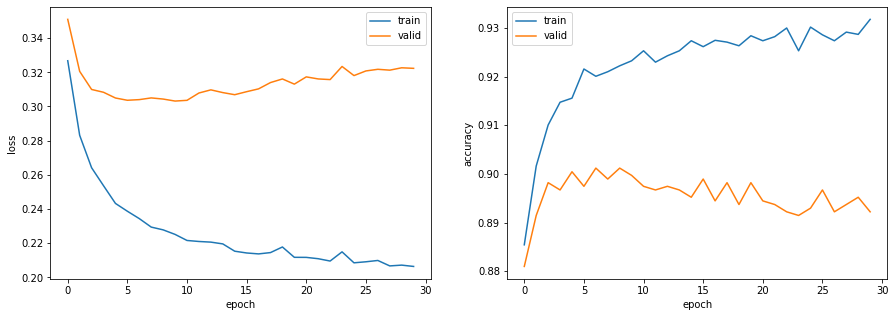

In [24]:
import numpy as np
from matplotlib import pyplot as plt

# 視覚化
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(np.array(log_train).T[0], label="train")
ax[0].plot(np.array(log_valid).T[0], label="valid")
ax[0].set_xlabel("epoch")
ax[0].set_ylabel("loss")
ax[0].legend()
ax[1].plot(np.array(log_train).T[1], label="train")
ax[1].plot(np.array(log_valid).T[1], label="valid")
ax[1].set_xlabel("epoch")
ax[1].set_ylabel("accuracy")
ax[1].legend()
plt.show()

#### 76. チェックポイント
問題75のコードを改変し，各エポックのパラメータ更新が完了するたびに，チェックポイント（学習途中のパラメータ（重み行列など）の値や最適化アルゴリズムの内部状態）をファイルに書き出せ．

学習途中のパラメータはmodel.state_dict()、最適化アルゴリズムの内部状態はoptimizer.state_dict()でアクセス可能なので、各エポックでエポック数と合わせて保存する処理を追加します。
なお、出力は前問と同様のため省略します。

In [25]:
# モデルの定義
model = SLPNet(300, 4)

# 損失関数の定義
criterion = nn.CrossEntropyLoss()

# オプティマイザの定義
optimizer = torch.optim.SGD(model.parameters(), lr=1e-1)

# 学習
num_epochs = 10
log_train = []
log_valid = []
for epoch in range(num_epochs):
    # 訓練モードに設定
    model.train()
    for inputs, labels in dataloader_train:
        # 勾配をゼロで初期化
        optimizer.zero_grad()

        # 順伝播 + 誤差逆伝播 + 重み更新
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    # 損失と正解率の算出
    loss_train, acc_train = calculate_loss_and_accuracy(
        model, criterion, dataloader_train
    )
    loss_valid, acc_valid = calculate_loss_and_accuracy(
        model, criterion, dataloader_valid
    )
    log_train.append([loss_train, acc_train])
    log_valid.append([loss_valid, acc_valid])

    # チェックポイントの保存
    torch.save(
        {
            "epoch": epoch,
            "model_state_dict": model.state_dict(),
            "optimizer_state_dict": optimizer.state_dict(),
        },
        f"checkpoint{epoch + 1}.pt",
    )

    # ログを出力
    print(
        f"epoch: {epoch + 1}, loss_train: {loss_train:.4f}, accuracy_train: {acc_train:.4f}, loss_valid: {loss_valid:.4f}, accuracy_valid: {acc_valid:.4f}"
    )

epoch: 1, loss_train: 0.3244, accuracy_train: 0.8890, loss_valid: 0.3650, accuracy_valid: 0.8623
epoch: 2, loss_train: 0.2827, accuracy_train: 0.9037, loss_valid: 0.3324, accuracy_valid: 0.8810
epoch: 3, loss_train: 0.2679, accuracy_train: 0.9086, loss_valid: 0.3287, accuracy_valid: 0.8795
epoch: 4, loss_train: 0.2504, accuracy_train: 0.9148, loss_valid: 0.3128, accuracy_valid: 0.8892
epoch: 5, loss_train: 0.2446, accuracy_train: 0.9180, loss_valid: 0.3129, accuracy_valid: 0.8915
epoch: 6, loss_train: 0.2384, accuracy_train: 0.9204, loss_valid: 0.3101, accuracy_valid: 0.8937
epoch: 7, loss_train: 0.2364, accuracy_train: 0.9206, loss_valid: 0.3135, accuracy_valid: 0.8937
epoch: 8, loss_train: 0.2314, accuracy_train: 0.9232, loss_valid: 0.3088, accuracy_valid: 0.8937
epoch: 9, loss_train: 0.2266, accuracy_train: 0.9243, loss_valid: 0.3092, accuracy_valid: 0.9012
epoch: 10, loss_train: 0.2237, accuracy_train: 0.9258, loss_valid: 0.3091, accuracy_valid: 0.8937


#### 77. ミニバッチ化
問題76のコードを改変し，BB事例ごとに損失・勾配を計算し，行列WWの値を更新せよ（ミニバッチ化）．BBの値を1,2,4,8,…1,2,4,8,…と変化させながら，1エポックの学習に要する時間を比較せよ．

バッチサイズを変えるごとにすべての処理を書くのは大変なので、Dataloaderの作成以降の処理をtrain_modelとして関数化し、バッチサイズを含むいくつかのパラメータを引数として設定します。

In [26]:
import time


def train_model(
    dataset_train, dataset_valid, batch_size, model, criterion, optimizer, num_epochs
):
    # dataloaderの作成
    dataloader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)
    dataloader_valid = DataLoader(
        dataset_valid, batch_size=len(dataset_valid), shuffle=False
    )

    # 学習
    log_train = []
    log_valid = []
    for epoch in range(num_epochs):
        # 開始時刻の記録
        s_time = time.time()

        # 訓練モードに設定
        model.train()
        for inputs, labels in dataloader_train:
            # 勾配をゼロで初期化
            optimizer.zero_grad()

            # 順伝播 + 誤差逆伝播 + 重み更新
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

        # 損失と正解率の算出
        loss_train, acc_train = calculate_loss_and_accuracy(
            model, criterion, dataloader_train
        )
        loss_valid, acc_valid = calculate_loss_and_accuracy(
            model, criterion, dataloader_valid
        )
        log_train.append([loss_train, acc_train])
        log_valid.append([loss_valid, acc_valid])

        # チェックポイントの保存
        torch.save(
            {
                "epoch": epoch,
                "model_state_dict": model.state_dict(),
                "optimizer_state_dict": optimizer.state_dict(),
            },
            f"checkpoint{epoch + 1}.pt",
        )

        # 終了時刻の記録
        e_time = time.time()

        # ログを出力
        print(
            f"epoch: {epoch + 1}, loss_train: {loss_train:.4f}, accuracy_train: {acc_train:.4f}, loss_valid: {loss_valid:.4f}, accuracy_valid: {acc_valid:.4f}, {(e_time - s_time):.4f}sec"
        )

    return {"train": log_train, "valid": log_valid}

バッチサイズを変えながら、処理時間を計測します。

In [27]:
# datasetの作成
dataset_train = CreateDataset(X_train, y_train)
dataset_valid = CreateDataset(X_valid, y_valid)

# モデルの定義
model = SLPNet(300, 4)

# 損失関数の定義
criterion = nn.CrossEntropyLoss()

# オプティマイザの定義
optimizer = torch.optim.SGD(model.parameters(), lr=1e-1)

# モデルの学習
for batch_size in [2 ** i for i in range(11)]:
    print(f"バッチサイズ: {batch_size}")
    log = train_model(
        dataset_train, dataset_valid, batch_size, model, criterion, optimizer, 1
    )

バッチサイズ: 1
epoch: 1, loss_train: 0.3329, accuracy_train: 0.8853, loss_valid: 0.3667, accuracy_valid: 0.8690, 7.3249sec
バッチサイズ: 2
epoch: 1, loss_train: 0.3032, accuracy_train: 0.8971, loss_valid: 0.3378, accuracy_valid: 0.8840, 2.5476sec
バッチサイズ: 4
epoch: 1, loss_train: 0.2916, accuracy_train: 0.9017, loss_valid: 0.3297, accuracy_valid: 0.8930, 1.4127sec
バッチサイズ: 8
epoch: 1, loss_train: 0.2875, accuracy_train: 0.9030, loss_valid: 0.3259, accuracy_valid: 0.8945, 0.8549sec
バッチサイズ: 16
epoch: 1, loss_train: 0.2855, accuracy_train: 0.9024, loss_valid: 0.3248, accuracy_valid: 0.8930, 0.5151sec
バッチサイズ: 32
epoch: 1, loss_train: 0.2847, accuracy_train: 0.9032, loss_valid: 0.3241, accuracy_valid: 0.8930, 0.3511sec
バッチサイズ: 64
epoch: 1, loss_train: 0.2841, accuracy_train: 0.9036, loss_valid: 0.3239, accuracy_valid: 0.8945, 0.2685sec
バッチサイズ: 128
epoch: 1, loss_train: 0.2854, accuracy_train: 0.9038, loss_valid: 0.3238, accuracy_valid: 0.8937, 0.2840sec
バッチサイズ: 256
epoch: 1, loss_train: 0.2837, accuracy_

#### 78. GPU上での学習
問題77のコードを改変し，GPU上で学習を実行せよ．

GPUを指定する引数deviceをcalculate_loss_and_accuracy、train_modelに追加します。
それぞれの関数内で、モデルおよび入力TensorをGPUに送る処理を追加し、deviceにcudaを指定すればGPUを使用することができます。

In [28]:
def calculate_loss_and_accuracy(model, criterion, loader, device):
    model.eval()
    loss = 0.0
    total = 0
    correct = 0
    with torch.no_grad():
        for inputs, labels in loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            loss += criterion(outputs, labels).item()
            pred = torch.argmax(outputs, dim=-1)
            total += len(inputs)
            correct += (pred == labels).sum().item()

    return loss / len(loader), correct / total


def train_model(
    dataset_train,
    dataset_valid,
    batch_size,
    model,
    criterion,
    optimizer,
    num_epochs,
    device=None,
):
    # GPUに送る
    model.to(device)

    # dataloaderの作成
    dataloader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)
    dataloader_valid = DataLoader(
        dataset_valid, batch_size=len(dataset_valid), shuffle=False
    )

    # 学習
    log_train = []
    log_valid = []
    for epoch in range(num_epochs):
        # 開始時刻の記録
        s_time = time.time()

        # 訓練モードに設定
        model.train()
        for inputs, labels in dataloader_train:
            # 勾配をゼロで初期化
            optimizer.zero_grad()

            # 順伝播 + 誤差逆伝播 + 重み更新
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model.forward(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

        # 損失と正解率の算出
        loss_train, acc_train = calculate_loss_and_accuracy(
            model, criterion, dataloader_train, device
        )
        loss_valid, acc_valid = calculate_loss_and_accuracy(
            model, criterion, dataloader_valid, device
        )
        log_train.append([loss_train, acc_train])
        log_valid.append([loss_valid, acc_valid])

        # チェックポイントの保存
        torch.save(
            {
                "epoch": epoch,
                "model_state_dict": model.state_dict(),
                "optimizer_state_dict": optimizer.state_dict(),
            },
            f"checkpoint{epoch + 1}.pt",
        )

        # 終了時刻の記録
        e_time = time.time()

        # ログを出力
        print(
            f"epoch: {epoch + 1}, loss_train: {loss_train:.4f}, accuracy_train: {acc_train:.4f}, loss_valid: {loss_valid:.4f}, accuracy_valid: {acc_valid:.4f}, {(e_time - s_time):.4f}sec"
        )

    return {"train": log_train, "valid": log_valid}

In [29]:
# datasetの作成
dataset_train = CreateDataset(X_train, y_train)
dataset_valid = CreateDataset(X_valid, y_valid)

# モデルの定義
model = SLPNet(300, 4)

# 損失関数の定義
criterion = nn.CrossEntropyLoss()

# オプティマイザの定義
optimizer = torch.optim.SGD(model.parameters(), lr=1e-1)

# デバイスの指定
device = device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# モデルの学習
for batch_size in [2 ** i for i in range(11)]:
    print(f"バッチサイズ: {batch_size}")
    log = train_model(
        dataset_train,
        dataset_valid,
        batch_size,
        model,
        criterion,
        optimizer,
        1,
        device=device,
    )

バッチサイズ: 1
epoch: 1, loss_train: 0.3252, accuracy_train: 0.8869, loss_valid: 0.3601, accuracy_valid: 0.8810, 7.8103sec
バッチサイズ: 2
epoch: 1, loss_train: 0.2972, accuracy_train: 0.8973, loss_valid: 0.3367, accuracy_valid: 0.8885, 2.5415sec
バッチサイズ: 4
epoch: 1, loss_train: 0.2883, accuracy_train: 0.9006, loss_valid: 0.3289, accuracy_valid: 0.8825, 1.4126sec
バッチサイズ: 8
epoch: 1, loss_train: 0.2845, accuracy_train: 0.9013, loss_valid: 0.3264, accuracy_valid: 0.8855, 1.2773sec
バッチサイズ: 16
epoch: 1, loss_train: 0.2829, accuracy_train: 0.9013, loss_valid: 0.3251, accuracy_valid: 0.8877, 0.6725sec
バッチサイズ: 32
epoch: 1, loss_train: 0.2821, accuracy_train: 0.9021, loss_valid: 0.3248, accuracy_valid: 0.8877, 0.4289sec
バッチサイズ: 64
epoch: 1, loss_train: 0.2817, accuracy_train: 0.9019, loss_valid: 0.3244, accuracy_valid: 0.8877, 0.3570sec
バッチサイズ: 128
epoch: 1, loss_train: 0.2815, accuracy_train: 0.9023, loss_valid: 0.3242, accuracy_valid: 0.8900, 0.2720sec
バッチサイズ: 256
epoch: 1, loss_train: 0.2812, accuracy_

#### 79. 多層ニューラルネットワーク
問題78のコードを改変し，バイアス項の導入や多層化など，ニューラルネットワークの形状を変更しながら，高性能なカテゴリ分類器を構築せよ．

多層ニューラルネットワークMLPNetを新たに定義します。このネットワークは入力層 -> 中間層 -> 出力層の構成とし、中間層のあとにバッチノーマライゼーションを行うことにします。
また、train_modelでは新たに学習の打ち切り基準を導入します。今回はシンプルに、検証データの損失が3エポック連続で低下しなかった場合に打ち切るルールとします。
さらに、学習率を徐々に下げるスケジューラも追加し、汎化性能の向上を狙います。

In [30]:
from torch.nn import functional as F


class MLPNet(nn.Module):
    def __init__(self, input_size, mid_size, output_size, mid_layers):
        super().__init__()
        self.mid_layers = mid_layers
        self.fc = nn.Linear(input_size, mid_size)
        self.fc_mid = nn.Linear(mid_size, mid_size)
        self.fc_out = nn.Linear(mid_size, output_size)
        self.bn = nn.BatchNorm1d(mid_size)

    def forward(self, x):
        x = F.relu(self.fc(x))
        for _ in range(self.mid_layers):
            x = F.relu(self.bn(self.fc_mid(x)))
        x = F.relu(self.fc_out(x))

        return x

In [31]:
from torch import optim


def calculate_loss_and_accuracy(model, criterion, loader, device):
    model.eval()
    loss = 0.0
    total = 0
    correct = 0
    with torch.no_grad():
        for inputs, labels in loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            loss += criterion(outputs, labels).item()
            pred = torch.argmax(outputs, dim=-1)
            total += len(inputs)
            correct += (pred == labels).sum().item()

    return loss / len(loader), correct / total


def train_model(
    dataset_train,
    dataset_valid,
    batch_size,
    model,
    criterion,
    optimizer,
    num_epochs,
    device=None,
):
    # GPUに送る
    model.to(device)

    # dataloaderの作成
    dataloader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)
    dataloader_valid = DataLoader(
        dataset_valid, batch_size=len(dataset_valid), shuffle=False
    )

    # スケジューラの設定
    scheduler = optim.lr_scheduler.CosineAnnealingLR(
        optimizer, num_epochs, eta_min=1e-5, last_epoch=-1
    )

    # 学習
    log_train = []
    log_valid = []
    for epoch in range(num_epochs):
        # 開始時刻の記録
        s_time = time.time()

        # 訓練モードに設定
        model.train()
        for inputs, labels in dataloader_train:
            # 勾配をゼロで初期化
            optimizer.zero_grad()

            # 順伝播 + 誤差逆伝播 + 重み更新
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model.forward(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

        # 損失と正解率の算出
        loss_train, acc_train = calculate_loss_and_accuracy(
            model, criterion, dataloader_train, device
        )
        loss_valid, acc_valid = calculate_loss_and_accuracy(
            model, criterion, dataloader_valid, device
        )
        log_train.append([loss_train, acc_train])
        log_valid.append([loss_valid, acc_valid])

        # チェックポイントの保存
        torch.save(
            {
                "epoch": epoch,
                "model_state_dict": model.state_dict(),
                "optimizer_state_dict": optimizer.state_dict(),
            },
            f"checkpoint{epoch + 1}.pt",
        )

        # 終了時刻の記録
        e_time = time.time()

        # ログを出力
        print(
            f"epoch: {epoch + 1}, loss_train: {loss_train:.4f}, accuracy_train: {acc_train:.4f}, loss_valid: {loss_valid:.4f}, accuracy_valid: {acc_valid:.4f}, {(e_time - s_time):.4f}sec"
        )

        # 検証データの損失が3エポック連続で低下しなかった場合は学習終了
        if (
            epoch > 2
            and log_valid[epoch - 3][0]
            <= log_valid[epoch - 2][0]
            <= log_valid[epoch - 1][0]
            <= log_valid[epoch][0]
        ):
            break

        # スケジューラを1ステップ進める
        scheduler.step()

    return {"train": log_train, "valid": log_valid}

In [32]:
# datasetの作成
dataset_train = CreateDataset(X_train, y_train)
dataset_valid = CreateDataset(X_valid, y_valid)

# モデルの定義
model = MLPNet(300, 200, 4, 1)

# 損失関数の定義
criterion = nn.CrossEntropyLoss()

# オプティマイザの定義
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

# デバイスの指定
device = device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# モデルの学習
log = train_model(
    dataset_train, dataset_valid, 64, model, criterion, optimizer, 1000, device=device
)

epoch: 1, loss_train: 0.9192, accuracy_train: 0.7470, loss_valid: 0.9150, accuracy_valid: 0.7455, 1.8610sec
epoch: 2, loss_train: 0.7352, accuracy_train: 0.7672, loss_valid: 0.7355, accuracy_valid: 0.7665, 1.7493sec
epoch: 3, loss_train: 0.6569, accuracy_train: 0.7770, loss_valid: 0.6595, accuracy_valid: 0.7754, 1.7833sec
epoch: 4, loss_train: 0.6081, accuracy_train: 0.7844, loss_valid: 0.6127, accuracy_valid: 0.7822, 0.9081sec
epoch: 5, loss_train: 0.5727, accuracy_train: 0.7911, loss_valid: 0.5793, accuracy_valid: 0.7897, 0.6647sec
epoch: 6, loss_train: 0.5420, accuracy_train: 0.8025, loss_valid: 0.5510, accuracy_valid: 0.7994, 0.6671sec
epoch: 7, loss_train: 0.5122, accuracy_train: 0.8125, loss_valid: 0.5242, accuracy_valid: 0.8084, 0.6830sec
epoch: 8, loss_train: 0.4830, accuracy_train: 0.8279, loss_valid: 0.4975, accuracy_valid: 0.8174, 0.6637sec
epoch: 9, loss_train: 0.4598, accuracy_train: 0.8423, loss_valid: 0.4765, accuracy_valid: 0.8308, 0.6663sec
epoch: 10, loss_train: 0.441